In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import brentq

In [2]:
m = 1.0
k = 2.7

M11 = m
M12 = 0
M22 = m
M33 = m
M44 = m
M55 = m
M66 = m
M77 = m
M88 = m

Mmat = np.array([[M11,M12,M12,M12,M12,M12,M12,M12],\
                   [M12,M22,M12,M12,M12,M12,M12,M12],\
                   [M12,M12,M33,M12,M12,M12,M12,M12],\
                   [M12,M12,M12,M44,M12,M12,M12,M12],\
                   [M12,M12,M12,M12,M55,M12,M12,M12],\
                   [M12,M12,M12,M12,M12,M66,M12,M12],\
                   [M12,M12,M12,M12,M12,M12,M77,M12],\
                   [M12,M12,M12,M12,M12,M12,M12,M88]])
Smat = np.zeros([8,8])
for i in range(0,8,1):
    Smat[i,i]=1/np.sqrt(Mmat[i,i])

print(Smat)

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


In [3]:
K11 = 3*k/4
K22 = 5*k/12
K33 = 3*k/4
K44 = 5*k/12
K55 = k/4
K66 = 5*k/4
K77 = k/4
K88 = 7*k/12
K12 = k/np.sqrt(3)
K13 = -k
K14 = 0
K15 = -k/4
K16 = -k*np.sqrt(3)/4
K17 = -k/4
K18 = -k*np.sqrt(3)/12
K23 = 0
K24 = 0
K25 = -k*np.sqrt(3)/4
K26 = -3*k/4
K27 = -k*np.sqrt(3)/12
K28 = -k/12
K34 = -k/np.sqrt(3)
K35 = -k/4
K36 = k*np.sqrt(3)/4
K37 = -k/4
K38 = k*np.sqrt(3)/12
K45 = k*np.sqrt(3)/4
K46 = -3*k/4
K47 = k*np.sqrt(3)/12
K48 = -k/12
K56 = 0
K57 = 0
K58 = 0
K67 = 0
K68 = -k
K78 = 0

Kmat = np.array([[K11,K12,K13,K14,K15,K16,K17,K18],\
                 [K12,K22,K23,K24,K25,K26,K27,K28],\
                 [K13,K23,K33,K34,K35,K36,K37,K38],\
                 [K14,K24,K34,K44,K45,K46,K47,K48],\
                 [K15,K25,K35,K45,K55,K56,K57,K58],\
                 [K16,K26,K36,K46,K56,K66,K67,K68],\
                 [K17,K27,K37,K47,K57,K67,K77,K78],\
                 [K18,K28,K38,K48,K58,K68,K78,K88]])
print(Kmat)

[[ 2.025       1.55884573 -2.7         0.         -0.675      -1.1691343
  -0.675      -0.38971143]
 [ 1.55884573  1.125       0.          0.         -1.1691343  -2.025
  -0.38971143 -0.225     ]
 [-2.7         0.          2.025      -1.55884573 -0.675       1.1691343
  -0.675       0.38971143]
 [ 0.          0.         -1.55884573  1.125       1.1691343  -2.025
   0.38971143 -0.225     ]
 [-0.675      -1.1691343  -0.675       1.1691343   0.675       0.
   0.          0.        ]
 [-1.1691343  -2.025       1.1691343  -2.025       0.          3.375
   0.         -2.7       ]
 [-0.675      -0.38971143 -0.675       0.38971143  0.          0.
   0.675       0.        ]
 [-0.38971143 -0.225       0.38971143 -0.225       0.         -2.7
   0.          1.575     ]]


In [4]:
tmp = np.matmul(Smat,Kmat)
K1mat = np.matmul(tmp,Smat)
print(K1mat)

[[ 2.025       1.55884573 -2.7         0.         -0.675      -1.1691343
  -0.675      -0.38971143]
 [ 1.55884573  1.125       0.          0.         -1.1691343  -2.025
  -0.38971143 -0.225     ]
 [-2.7         0.          2.025      -1.55884573 -0.675       1.1691343
  -0.675       0.38971143]
 [ 0.          0.         -1.55884573  1.125       1.1691343  -2.025
   0.38971143 -0.225     ]
 [-0.675      -1.1691343  -0.675       1.1691343   0.675       0.
   0.          0.        ]
 [-1.1691343  -2.025       1.1691343  -2.025       0.          3.375
   0.         -2.7       ]
 [-0.675      -0.38971143 -0.675       0.38971143  0.          0.
   0.675       0.        ]
 [-0.38971143 -0.225       0.38971143 -0.225       0.         -2.7
   0.          1.575     ]]


In [5]:
w,v=np.linalg.eigh(K1mat)
print(w)

[-1.9361288  -1.72728863 -0.8445574   0.77894435  0.95882512  3.59290168
  4.22100099  7.55630269]


In [6]:
for i in range(0,8,1):
    print(v[:,i])

[ 3.89858464e-02  4.19407050e-01 -3.89858464e-02  4.19407050e-01
  4.33717274e-16  6.05358246e-01 -4.19766676e-16  5.27917659e-01]
[ 6.23920169e-01 -2.68303960e-01  6.23920169e-01  2.68303960e-01
  8.94669793e-02  1.43655286e-15  2.63569490e-01  1.35287378e-15]
[-7.30330758e-02 -4.32386178e-01 -7.30330758e-02  4.32386178e-01
 -7.30232152e-01  4.09285379e-16 -2.86666581e-01  6.20403646e-16]
[-1.18114743e-01  8.71015685e-02 -1.18114743e-01 -8.71015685e-02
 -4.25342606e-01  2.09030944e-16  8.80913229e-01  1.04804101e-15]
[-2.99569062e-01  4.83971849e-01  2.99569062e-01  4.83971849e-01
 -8.99697822e-16 -1.26480787e-01  1.55667062e-15 -5.79708429e-01]
[ 3.02388327e-01  4.83185777e-01  3.02388327e-01 -4.83185777e-01
 -5.27105617e-01  6.24551487e-16 -2.68970777e-01 -8.12385002e-16]
[ 4.92547852e-01  1.33242457e-02 -4.92547852e-01  1.33242457e-02
  8.30379323e-16  4.23139918e-01  2.40573341e-16 -5.79129317e-01]
[-4.07596730e-01 -2.99485292e-01  4.07596730e-01 -2.99485292e-01
 -2.34120760e-17  

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

a = 6.0
x10 = -a/2
y10 = 0.0
x20 = a/2
y20 = 0.0
x30 = 0.0
y30 = a*np.sqrt(3)/2
x40 = 0.0
y40 = a*np.sqrt(3)/6

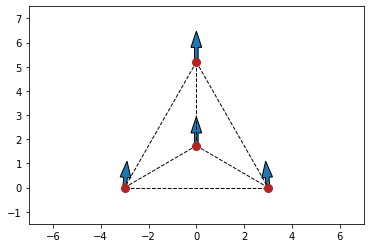

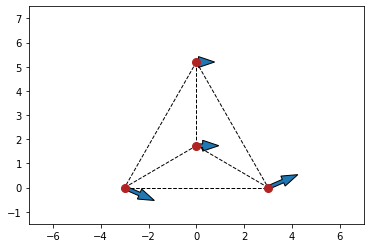

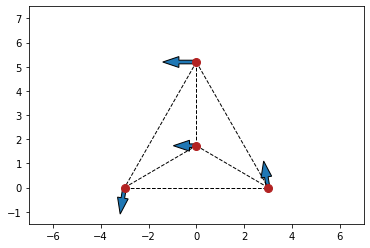

In [8]:
#translation and rotation modes 
for i in range(0,3,1):
    x1=v[0,i]
    y1=v[1,i]
    x2=v[2,i]
    y2=v[3,i]
    x3=v[4,i]
    y3=v[5,i]
    x4=v[6,i]
    y4=v[7,i]
    plt.figure(i)
    plt.plot([x10,x20],[y10,y20],ls='--',lw=1,color='k')
    plt.plot([x30,x20],[y30,y20],ls='--',lw=1,color='k')
    plt.plot([x30,x40],[y30,y40],ls='--',lw=1,color='k')
    plt.plot([x30,x10],[y30,y10],ls='--',lw=1,color='k')
    plt.plot([x10,x40],[y10,y40],ls='--',lw=1,color='k')
    plt.plot([x40,x20],[y40,y20],ls='--',lw=1,color='k')
    plt.plot([x10],[y10],'o',markersize=8,markerfacecolor='firebrick',markeredgecolor='firebrick')
    plt.plot([x30],[y30],'o',markersize=8,markerfacecolor='firebrick',markeredgecolor='firebrick')
    plt.plot([x20],[y20],'o',markersize=8,markerfacecolor='firebrick',markeredgecolor='firebrick')
    plt.plot([x40],[y40],'o',markersize=8,markerfacecolor='firebrick',markeredgecolor='firebrick')
    plt.arrow(x10,y10,x1,y1,width=0.15)
    plt.arrow(x20,y20,x2,y2,width=0.15)
    plt.arrow(x30,y30,x3,y3,width=0.15)
    plt.arrow(x40,y40,x4,y4,width=0.15)
    plt.xlim(-7,7)
    plt.ylim(-1.5,7.5)
    plt.show()

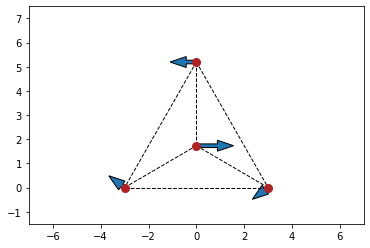

In [14]:
#vibration modes
#mode 1
x1=v[0,3]
y1=v[1,3]
x2=v[2,3]
y2=v[3,3]
x3=v[4,3]
y3=v[5,3]
x4=v[6,3]
y4=v[7,3]
plt.figure(1)
plt.plot([x10,x20],[y10,y20],ls='--',lw=1,color='k')
plt.plot([x30,x20],[y30,y20],ls='--',lw=1,color='k')
plt.plot([x30,x40],[y30,y40],ls='--',lw=1,color='k')
plt.plot([x30,x10],[y30,y10],ls='--',lw=1,color='k')
plt.plot([x10,x40],[y10,y40],ls='--',lw=1,color='k')
plt.plot([x40,x20],[y40,y20],ls='--',lw=1,color='k')
plt.plot([x10],[y10],'o',markersize=8,markerfacecolor='firebrick',markeredgecolor='firebrick')
plt.plot([x30],[y30],'o',markersize=8,markerfacecolor='firebrick',markeredgecolor='firebrick')
plt.plot([x20],[y20],'o',markersize=8,markerfacecolor='firebrick',markeredgecolor='firebrick')
plt.plot([x40],[y40],'o',markersize=8,markerfacecolor='firebrick',markeredgecolor='firebrick')
plt.arrow(x10,y10,x1,y1,width=0.15)
plt.arrow(x20,y20,x2,y2,width=0.15)
plt.arrow(x30,y30,x3,y3,width=0.15)
plt.arrow(x40,y40,x4,y4,width=0.15)
plt.xlim(-7,7)
plt.ylim(-1.5,7.5)
plt.show()

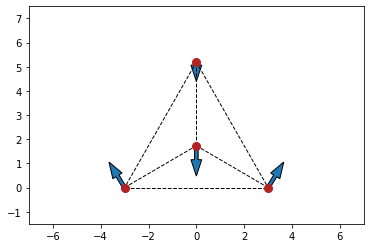

In [10]:
#mode 2
x1=v[0,4]
y1=v[1,4]
x2=v[2,4]
y2=v[3,4]
x3=v[4,4]
y3=v[5,4]
x4=v[6,4]
y4=v[7,4]
plt.figure(2)
plt.plot([x10,x20],[y10,y20],ls='--',lw=1,color='k')
plt.plot([x30,x20],[y30,y20],ls='--',lw=1,color='k')
plt.plot([x30,x40],[y30,y40],ls='--',lw=1,color='k')
plt.plot([x30,x10],[y30,y10],ls='--',lw=1,color='k')
plt.plot([x10,x40],[y10,y40],ls='--',lw=1,color='k')
plt.plot([x40,x20],[y40,y20],ls='--',lw=1,color='k')
plt.plot([x10],[y10],'o',markersize=8,markerfacecolor='firebrick',markeredgecolor='firebrick')
plt.plot([x30],[y30],'o',markersize=8,markerfacecolor='firebrick',markeredgecolor='firebrick')
plt.plot([x20],[y20],'o',markersize=8,markerfacecolor='firebrick',markeredgecolor='firebrick')
plt.plot([x40],[y40],'o',markersize=8,markerfacecolor='firebrick',markeredgecolor='firebrick')
plt.arrow(x10,y10,x1,y1,width=0.15)
plt.arrow(x20,y20,x2,y2,width=0.15)
plt.arrow(x30,y30,x3,y3,width=0.15)
plt.arrow(x40,y40,x4,y4,width=0.15)
plt.xlim(-7,7)
plt.ylim(-1.5,7.5)
plt.show()

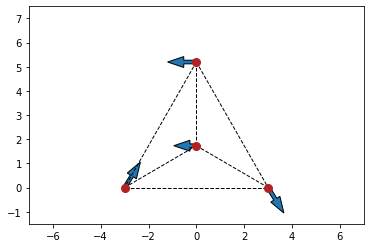

In [11]:
#mode 3
x1=v[0,5]
y1=v[1,5]
x2=v[2,5]
y2=v[3,5]
x3=v[4,5]
y3=v[5,5]
x4=v[6,5]
y4=v[7,5]
plt.figure(3)
plt.plot([x10,x20],[y10,y20],ls='--',lw=1,color='k')
plt.plot([x30,x20],[y30,y20],ls='--',lw=1,color='k')
plt.plot([x30,x40],[y30,y40],ls='--',lw=1,color='k')
plt.plot([x30,x10],[y30,y10],ls='--',lw=1,color='k')
plt.plot([x10,x40],[y10,y40],ls='--',lw=1,color='k')
plt.plot([x40,x20],[y40,y20],ls='--',lw=1,color='k')
plt.plot([x10],[y10],'o',markersize=8,markerfacecolor='firebrick',markeredgecolor='firebrick')
plt.plot([x30],[y30],'o',markersize=8,markerfacecolor='firebrick',markeredgecolor='firebrick')
plt.plot([x20],[y20],'o',markersize=8,markerfacecolor='firebrick',markeredgecolor='firebrick')
plt.plot([x40],[y40],'o',markersize=8,markerfacecolor='firebrick',markeredgecolor='firebrick')
plt.arrow(x10,y10,x1,y1,width=0.15)
plt.arrow(x20,y20,x2,y2,width=0.15)
plt.arrow(x30,y30,x3,y3,width=0.15)
plt.arrow(x40,y40,x4,y4,width=0.15)
plt.xlim(-7,7)
plt.ylim(-1.5,7.5)
plt.show()

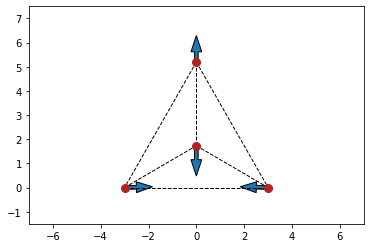

In [12]:
#mode 4
x1=v[0,6]
y1=v[1,6]
x2=v[2,6]
y2=v[3,6]
x3=v[4,6]
y3=v[5,6]
x4=v[6,6]
y4=v[7,6]
plt.figure(4)
plt.plot([x10,x20],[y10,y20],ls='--',lw=1,color='k')
plt.plot([x30,x20],[y30,y20],ls='--',lw=1,color='k')
plt.plot([x30,x40],[y30,y40],ls='--',lw=1,color='k')
plt.plot([x30,x10],[y30,y10],ls='--',lw=1,color='k')
plt.plot([x10,x40],[y10,y40],ls='--',lw=1,color='k')
plt.plot([x40,x20],[y40,y20],ls='--',lw=1,color='k')
plt.plot([x10],[y10],'o',markersize=8,markerfacecolor='firebrick',markeredgecolor='firebrick')
plt.plot([x30],[y30],'o',markersize=8,markerfacecolor='firebrick',markeredgecolor='firebrick')
plt.plot([x20],[y20],'o',markersize=8,markerfacecolor='firebrick',markeredgecolor='firebrick')
plt.plot([x40],[y40],'o',markersize=8,markerfacecolor='firebrick',markeredgecolor='firebrick')
plt.arrow(x10,y10,x1,y1,width=0.15)
plt.arrow(x20,y20,x2,y2,width=0.15)
plt.arrow(x30,y30,x3,y3,width=0.15)
plt.arrow(x40,y40,x4,y4,width=0.15)
plt.xlim(-7,7)
plt.ylim(-1.5,7.5)
plt.show()

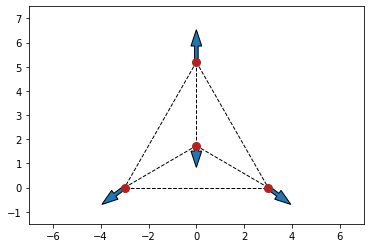

In [13]:
#mode 5
x1=v[0,7]
y1=v[1,7]
x2=v[2,7]
y2=v[3,7]
x3=v[4,7]
y3=v[5,7]
x4=v[6,7]
y4=v[7,7]
plt.figure(5)
plt.plot([x10,x20],[y10,y20],ls='--',lw=1,color='k')
plt.plot([x30,x20],[y30,y20],ls='--',lw=1,color='k')
plt.plot([x30,x40],[y30,y40],ls='--',lw=1,color='k')
plt.plot([x30,x10],[y30,y10],ls='--',lw=1,color='k')
plt.plot([x10,x40],[y10,y40],ls='--',lw=1,color='k')
plt.plot([x40,x20],[y40,y20],ls='--',lw=1,color='k')
plt.plot([x10],[y10],'o',markersize=8,markerfacecolor='firebrick',markeredgecolor='firebrick')
plt.plot([x30],[y30],'o',markersize=8,markerfacecolor='firebrick',markeredgecolor='firebrick')
plt.plot([x20],[y20],'o',markersize=8,markerfacecolor='firebrick',markeredgecolor='firebrick')
plt.plot([x40],[y40],'o',markersize=8,markerfacecolor='firebrick',markeredgecolor='firebrick')
plt.arrow(x10,y10,x1,y1,width=0.15)
plt.arrow(x20,y20,x2,y2,width=0.15)
plt.arrow(x30,y30,x3,y3,width=0.15)
plt.arrow(x40,y40,x4,y4,width=0.15)
plt.xlim(-7,7)
plt.ylim(-1.5,7.5)
plt.show()